### List Libraries to Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas_profiling import ProfileReport

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pickle

### Load the Dataset

In [31]:
df = pd.read_csv('Admission_Prediction.csv')

In [32]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


### Generate Profile Report to Understand Data

In [33]:
pf = ProfileReport(df)

pf.to_widgets()  # To create widget screen within Jupyter Notebook

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Handle missing values and duplicates

See Jupyter Notebook:  01. EDA Important Codes.ipynb

## Linear Regression (One Feature)

In [34]:
df = pd.read_csv('Advertising.csv')

x = df[["TV"]]
y = df['Sales']   


In [35]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression()

In [10]:
# To check coeffecients (slope)

linear.coef_

array([0.05546477])

In [11]:
# To check intercept

linear.intercept_

6.974821488229891

### Save the Model

Only saves the model information. For example, y = 0.5x + 3. Does not save the input dataset.

In [12]:
file = 'linear_reg.sav'                 
pickle.dump(linear,open(file,'wb'))

### Predict / Estimate

Use the model to predict/estimate label based on input value of the feature

In [13]:
linear.predict([[45]])

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.47073616])

In [14]:
l = [4,5,6,7,89,34,45,67,23]

In [15]:
for i in l :
    print(linear.predict([[i]]))

[7.19668057]
[7.25214534]
[7.30761011]
[7.36307488]
[11.91118606]
[8.86062368]
[9.47073616]
[10.69096111]
[8.25051121]


C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-pa

### How to Use Saved Model Directly for Predictions

In [16]:
file = 'linear_reg.sav'
pickle.dump(linear,open(file,'wb'))

In [17]:
saved_model = pickle.load(open(file,'rb'))

In [18]:
saved_model.predict([[45]])

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.47073616])

### Model Score

In [19]:
linear.score(x,y)

0.8121757029987414

## Multiple variable regression or polynomial regression

In [20]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
x = df[['TV', 'Radio', 'Newspaper']]

In [22]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y = df.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [24]:
linear = LinearRegression() #create an object of linear regression
linear.fit(x,y)

LinearRegression()

In [25]:
print(linear.intercept_)
print(linear.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


#### The equation is:      Sales = 0.0544 TV + 0.107 Radio + 0.00033 Newspaper + 4.625
This equation is the model

#### How to find the confidence of this model? Answer: r^2

What is confidence? Out of 100 datapoints, how many times will the output of the equation is same as actual value

In [26]:
linear.score(x,y)

0.9025912899684558

In [27]:
new_x = df[['TV', 'Radio']]
y = df.Sales

In [28]:
lm1 = LinearRegression()
lm1.fit(new_x, y)
lm1.score(new_x,y)

0.9025896186081139

### Two Ways to Code Regression

There are two ways to code regression models:
    
    1. using Scikit learn (sklearn) library. Already discussed
    2. Using statistical model approach.
    
    Let's learn about 2nd type

In [29]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data = df).fit()    #ols: ordinary least square 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           8.13e-99
Time:                        11:26:59   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**See the values of p > |t|**    

For news paper, it is 0.954.     

Subtract this number from 1. That is 1-0.954 = 0.046 or 4.6%     

This means Newspaper significance level is only 4.6% (Very low). News paper is contributing only 4.6%     

In simple words, This means, out of 100 experiments, there are only 4.6 experiments is contributing to sales. This is too low.    
So, newspaper feature can be dropped while feature selection (a check where we see what features are contributing and what features are not contributing).

**Significance cutoff value:**

As a general rule of thumb, if a feature has significance of over 95% we will keep it (during feature selection) or else, we will drop the feature. Some times, significance cut off can be 90% too.

**See the values of std err. This is called standard error or standard deviation.**

TV + Radio + Newspaper: 0.901

**How adjusted R - square is different than R - square, in which scenario, we consider R - square**

If r-square is increasing, it is usually not because the model accuracy is increasing. It is due to over-fitting. So, r-square is not a reliable metric to determine the accuracy of the model.

This is where adjusted r-square comes into picture. Adjusted r - square is a reliable measure of accuracy of the model.


r square  = 1 - RSS/TSS  = 1 - residual summations square / total summation square


Adjusted r square =  1 -  ((1-R2)(N-1)/(N-P-1))   

where,  P is number of features or number of feature columns, N is number of total rows or total samples








**Multicollinearity**

Multicollinearity is a statistical concept where several independent variables in a model are correlated

Example: Demand (or supply) and cost  are usually multicollinear (or correlated)

How to find multicollinearity between variables:

Most common approach is: Pearson's r plot (or Pearson's Correlation Plot).


Always remember, when we talk about multicollinearity, we talk about how various features are correlated and NOT feature and label (output).


**Variance Inflation Factor (VIF)**

See this: https://www.youtube.com/watch?v=GMAp_tP1ZQ0

VIF = 1 / (1-R2)

If VIF > 10 (or R2 > 0.9), then we can consider that the dataset is highly correlated or collinear.



#### Regularization  Techniques

1. Least Absolute Shrinkage and Selection Operator (LASSO). This is also called L1 regularization

If coeffecients are small, for example 0.1 then L2 (Ridge) will remain unaffected while L1(Lasso) is affected.
If coeffecients are big, for example 2 then L2 (Ridge) will have very high effect while L1(Lasso) will have moderate effect

For generalized equation, that takes care of all values of coeffecients (small or big), we use "Elastic Net"

Cost Function for Elastic Net Regression: See below (hand written notes)    

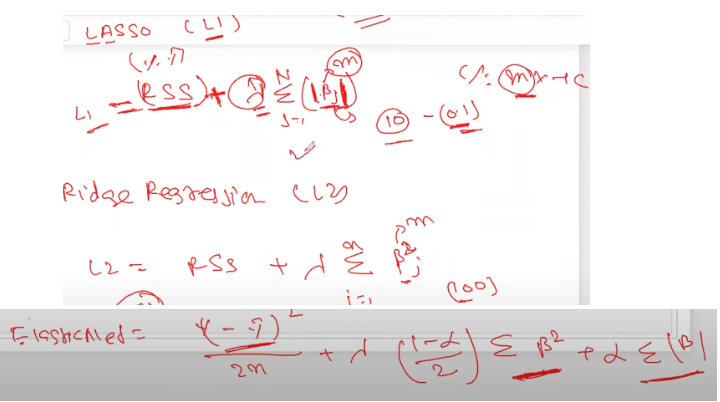

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#cv in RidgeCV, LassoCV etc. means cross validation

In [42]:
df = pd.read_csv('Admission_Prediction.csv')

In [43]:
pf = ProfileReport(df)

pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
#fill null values in GRE score column with mean

#In future classes, we will use imputers

In [45]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [46]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())

In [47]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Create Label dataframe (output)

In [48]:
y = df['Chance of Admit']

#### Create Features Dataframe

In [49]:
#To create features dataframe, we remove label (output) column from df

x = df.drop(columns=['Chance of Admit'])

**Let's drop `Serial No.` column**

In [50]:
x = x.drop(columns=['Serial No.'])

### Perform Normalization / Standardization Operations

This is done in order to acheive convergence.

This can be done using StandardScaler

**Why is standard scaler used?**

If a dataset feature has a lot of variance (that is, data of that feature has high dispersion or high variability), the model will not be able to acheive convergence easily. That is, the model will not be able to easily find the relationship between that feature and label. To acheive convergence easily, we used standard scaler technique. 

In standard scaler, we use Z-scores instead of the actual values to make the data distribution as standard normal distribution

Z-score of x is calculated as : $(x - \mu)/\sigma$

where $\mu$ is mean and $\sigma$ is standard deviation

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

In [51]:
scaler = StandardScaler() # create object of StandardScaler

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


In [53]:
arr = scaler.fit_transform(x)  # Applies standard scaler operation on all the features of x dataframe 

In [54]:
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [55]:
df1 = pd.DataFrame(arr)

df1

,0,1,2,3,4,5,6
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405
496,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405
497,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405
498,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152


In [56]:
pf1 = df1.profile_report()

pf1.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
#check multi-collinearity, use VIF and 

### Let's see how the new data is correlated through variation inflation factor

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# To see the shape of the array. To see rows and columns of the array

arr.shape

(500, 7)

In [60]:
arr.shape[1]  #shows columns

7

In [61]:
for i in range(arr.shape[1]):     #i here is index from 0 to 7
    print(variance_inflation_factor(arr, i))

4.153267572225826
3.792866110594647
2.508768242278763
2.7757495092534965
2.037307662489752
4.651669561154733
1.4593106786827288


In [65]:
vif_df = pd.DataFrame()

In [66]:
#above code can also be written as 

vif_df['vif'] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]

In [67]:
vif_df['features'] = x.columns

In [69]:
vif_df

,vif,features
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


### Split the Dataset into: Train and Test Data

In [70]:
train_test_split(arr, y, test_size=0.25) # gives 4 tuples: x_train, x_test, y_train, and y_test

[array([[-2.03363234, -2.01607667, -1.88144112, ..., -2.14596996,
         -1.54986443, -1.12815215],
        [ 2.11318582,  2.11937866,  1.66568791, ...,  1.09894429,
          2.20712188,  0.88640526],
        [-0.23066792, -0.52731275,  0.77890565, ...,  1.63976333,
          0.73411844, -1.12815215],
        ...,
        [-0.05037148, -0.69273097, -0.1078766 , ..., -1.60515091,
         -1.48366203, -1.12815215],
        [ 0.85111073,  1.12686938, -0.1078766 , ..., -0.52351283,
          0.88307384,  0.88640526],
        [-1.49274302, -1.51982203, -1.88144112, ..., -1.06433187,
         -0.92094161, -1.12815215]]),
 array([[ 1.29924962e-01, -3.10581135e-02, -1.07876604e-01,
         -3.77773152e-01,  1.73062093e-02, -5.07176601e-01,
          8.86405260e-01],
        [ 2.20073183e-01,  1.34360100e-01, -1.07876604e-01,
         -3.77773152e-01,  1.73062093e-02, -6.03103882e-02,
          8.86405260e-01],
        [-1.04200191e+00, -5.27312752e-01, -9.94658860e-01,
         -8.8281747

In [71]:
x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25)

Use random_state parameter so that randomness in selection (or random state) can be replicated while splitting train and test datam

In [110]:
x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 100)

x_train

array([[-0.41096436, -0.52731275, -0.1078766 , ...,  0.01730621,
        -0.25891759, -1.12815215],
       [ 0.12992496, -0.19647633, -0.1078766 , ..., -0.52351283,
         0.12174622, -1.12815215],
       [-1.13215013, -1.02356739, -0.99465886, ..., -1.06433187,
        -1.51676323, -1.12815215],
       ...,
       [-1.04200191, -0.85814918, -0.99465886, ..., -1.06433187,
        -0.65613201, -1.12815215],
       [-0.50111259, -0.85814918, -0.1078766 , ...,  0.55812525,
         0.10519562,  0.88640526],
       [-1.31244657, -0.85814918, -1.88144112, ..., -2.14596996,
        -0.95404281, -1.12815215]])

In [111]:
lr = LinearRegression()   #call an object of linear regression
lr.fit(x_train, y_train)  # fit a line

LinearRegression()

In [112]:
lr.coef_

array([0.015458  , 0.01908417, 0.00381077, 0.00315846, 0.01678637,
       0.07622763, 0.01400522])

In [113]:
lr.intercept_

0.7181156002659718

In [114]:
pickle.dump(lr, open('admission_lr_model.pickle', 'wb'))  #save the model 

# you can also create in other formats such as .sav etc. instead of .pickle

In [116]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [117]:
lr.predict([[337, 118, 4.0, 4.5, 4.5, 9.65,1]])

array([9.03398929])

The prediction is 9.86. This is not accurate because we transformed the train data using Standard Scaler Transform earlier. 

So, we cannot input actual values in predict method. Instead use transform method on the input before passing them into predict method

In [118]:
scaler.transform([[337, 118, 4.0, 4.5, 4.5, 9.65,1]])

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

In [119]:
lr.predict([[1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

array([0.95359739])

The prediction is 0.95. This is close to the actual label, 0.92.

In [120]:
test1 = scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [121]:
lr.predict(test1)

array([0.8007552])

This is close to actual label, 0.76

In [122]:
lr.score(x_test,y_test)  #check model accuracy with test data. Note that this method gives r-square not adjusted r-square

0.8262844735686963

In [123]:
#Let's create a function for adjusted r-square

def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]  # no. of rows of data or no. of samples.
    p = x.shape[1]  # no. of columns of data or no. of features.
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [124]:
adj_r2(x_test, y_test)

0.8158912369446012

#### Adjusted r-square is the true score. It is the real score for accuracy. Do not use r-square for accuracy rating.

In [125]:
lr.coef_

array([0.015458  , 0.01908417, 0.00381077, 0.00315846, 0.01678637,
       0.07622763, 0.01400522])

In [126]:
lr.intercept_

0.7181156002659718

### Regularization - Lasso, Ridge, and ElasticNet

In [134]:
#cv means cross validation. It is a technique to find out best possible parameter by doing a random experiment.

#We said cv =5, see what it means through the explaination below

lassocv = LassoCV(alphas=None, cv=5, max_iter=20000000, normalize=True)

### What is Cross Validation?

CV = 5 means it will divide the whole dataset into 5 parts and maximum iterations is given as 20000000.     

While trying to find the best possible lambda parameter (this is same as alpha parameter in lasso formula in Scikit or sklearn library),              

In the first iteration, it will take the any of 4 parts of the the 5 parts for training and the remaining data set for testing     

and for second iteration, it will again take any of 4 parts of the the 5 parts for training and the remaining data set for     testing    

this process is repeated for 20000000 iterations to find the best possible alpha (same as lambda) parameter    

This process is called cross validation     

Cross validation is used heavily for hyper parameter tuning

### Lasso Regression

In [136]:
lassocv = LassoCV(alphas=None, cv=50, max_iter=20000000, normalize=True)
lassocv.fit(x_train, y_train)

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=50, max_iter=20000000, normalize=True)

In [137]:
lassocv.alpha_  # alpha and lambda are used interchangably, Lambda is in the mathematical formula, Scikit learn, sklearn uses alpha

8.473141750339756e-06

In [138]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=8.473141750339756e-06)

In [139]:
lasso.score(x_test, y_test)

0.8262960984134351

### Ridge Regression

In [141]:
ridgecv = RidgeCV(alphas=(0.1,1.0,10.0), cv=10, normalize=True) 
# We are asking algorithm to pick alpha as 0.1, 1, or 10. Alpha is a hyper parameter

#### Let's use a wider range of numbers for alpha so that it will be able to fit a better fit

In [143]:
np.random.uniform(0,10,50)

array([7.4666174 , 5.35833067, 7.61999309, 3.44283346, 4.07284686,
       1.88599028, 7.75204179, 0.66418685, 8.5801127 , 0.92808817,
       4.11462612, 9.17253569, 3.69598028, 6.73270084, 4.9642415 ,
       3.2211207 , 4.88118362, 9.23358315, 5.18498948, 6.14375547,
       5.1670461 , 0.76729951, 4.07886372, 1.09596606, 1.82191003,
       9.73583959, 9.61776694, 1.98147535, 6.34864223, 9.59346584,
       1.03692451, 0.27131759, 4.14063085, 7.48179031, 3.06274804,
       8.84120761, 5.245165  , 4.71422094, 4.7658212 , 9.60372048,
       5.08947334, 2.60513926, 6.38734547, 2.74210817, 0.93857181,
       9.59148673, 1.14415793, 4.09555871, 4.18816194, 4.44165311])

In [144]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50), cv=10, normalize=True) 
ridgecv.fit(x_train,y_train)

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

RidgeCV(alphas=array([9.55553378, 5.56571277, 7.00676819, 1.72645871, 6.22480596,
       5.29451442, 5.80505445, 0.58317563, 2.76061289, 0.6733001 ,
       7.49992363, 2.64161606, 6.19089239, 1.06209979, 7.08947098,
       1.32495341, 8.09414887, 4.99586118, 1.98391975, 4.14422568,
       5.56758242, 9.12335225, 7.282634  , 2.05956577, 2.49499718,
       0.48263422, 9.13256337, 8.91640734, 8.48082213, 6.79229895,
       3.46481658, 3.27920503, 8.06779457, 0.84217665, 6.17942837,
       5.22824802, 6.64324145, 7.67795064, 3.12397065, 8.9590816 ,
       3.39945429, 4.71972824, 6.47806144, 9.41751745, 9.49565   ,
       6.09564658, 8.50049252, 6.11891426, 3.46577114, 3.82307853]),
        cv=10, normalize=True)

In [145]:
ridgecv.alpha_

0.4826342163941555

In [146]:
ridge_lr = Ridge(alpha=ridgecv.alpha_) #Create Ridge object
ridge_lr.fit(x_train, y_train)

Ridge(alpha=0.4826342163941555)

#### Model has been built, Let's check accuracy

In [148]:
ridge_lr.score(x_test, y_test) #gives r2 score. Let's only use this to compare with lasso and lr

0.8264459301121336

### Elastic Net

In [150]:
elastic =ElasticNetCV(alphas=None, cv = 10)
elastic.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [151]:
elastic.alpha_   #For elastic, lambda and alpha is required

0.00032049828688228085

In [153]:
elastic.l1_ratio_

0.5

### Important Note on Alpha and Lambda in the formula and how they are used in Scikit learn or Sklearn library

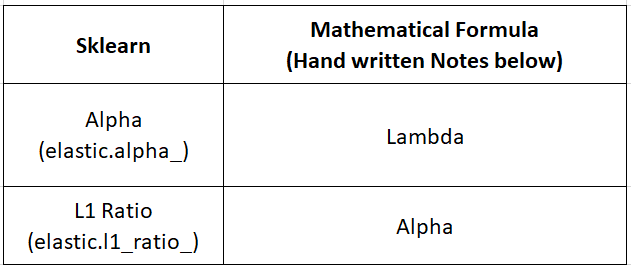

In [160]:
elastic_lr = ElasticNet(alpha=elastic.alpha_, l1_ratio=elastic.l1_ratio_)

In [161]:
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.00032049828688228085)

In [159]:
elastic_lr.score(x_test,y_test)

0.826325288875773

If coeffecients are small, for example 0.1 then L2 (Ridge) will remain unaffected while L1(Lasso) is affected.
If coeffecients are big, for example 2 then L2 (Ridge) will have very high effect while L1(Lasso) will have moderate effect

For generalized equation, that takes care of all values of coeffecients (small or big), we use "Elastic Net"

Cost Function for Elastic Net Regression: See below (hand written notes)    

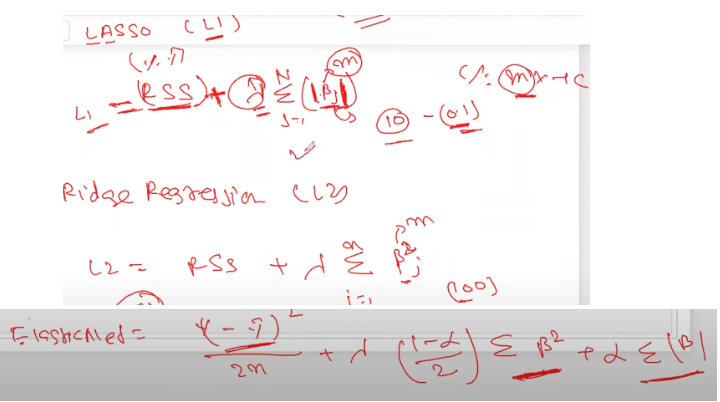